In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
# Labeled data
labeled_data = [
    {"resume": "I am a software developer proficient in Java.", "industry": "software"},
    {"resume": "Experienced in data analysis and machine learning algorithms.", "industry": "data"},
    {"resume": "Web developer skilled in HTML, CSS, and JavaScript.", "industry": "web"},
    {"resume": "Mobile app developer with expertise in Android and iOS platforms.", "industry": "mobile"},
    {"resume": "Frontend developer experienced in React and Angular frameworks.", "industry": "frontend"},
    {"resume": "Backend developer proficient in Node.js and Python Flask.", "industry": "backend"},
    {"resume": "Experienced in DevOps practices including CI/CD pipelines and Docker.", "industry": "devops"},
    {"resume": "UI/UX designer specializing in creating intuitive and visually appealing interfaces.", "industry": "uiux"}
]

In [4]:
# Preprocess the labeled data
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

X = [preprocess_text(data["resume"]) for data in labeled_data]
y = [data["industry"] for data in labeled_data]

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a supervised learning model
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression())
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

In [6]:
# Evaluate the model
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.0


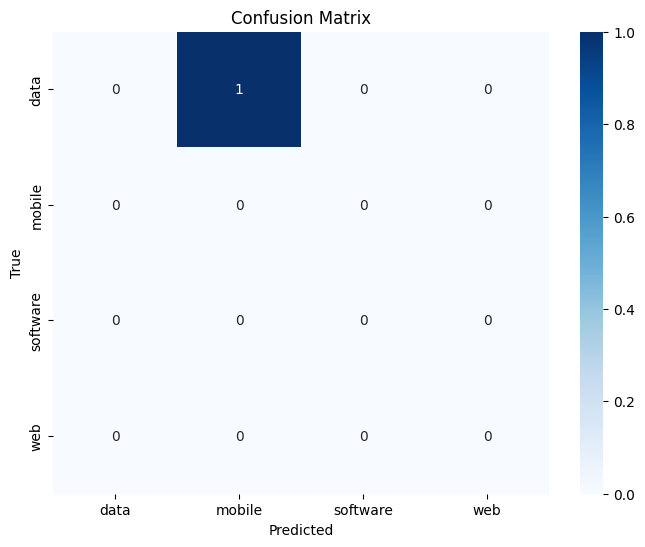

In [7]:
# Visualize the confusion matrix
labels = sorted(set(y))
cm = confusion_matrix(y_test, y_pred, labels=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [14]:
def getPredicted_industry(student_details):
  # Extract features from the input resume
  about_text = student_details["cvProfile"]["about"]
  work_experience_text = " ".join([exp["jobDescription"] for exp in student_details["workExperience"]])
  skills_text = " ".join([skill["skillName"] for skill in student_details["skills"]])

  # Combine all relevant text data
  resume_text = " ".join([about_text, work_experience_text, skills_text])

  # Preprocess the combined text
  preprocessed_text = preprocess_text(resume_text)

  # Predict the suitable IT industry
  predicted_industry = pipeline.predict([preprocessed_text])[0]
  print("Predicted Industry:", predicted_industry)

In [19]:
# Input resume JSON data
student_details = {
    "student": {
        "userID": "2",
        "firstName": "Jane",
        "lastName": "Smith",
        "email": "jane.smith@example.com",
        "phone": "987654321",
        "dob": "2000-05-20",
        "userPassword": "password123"
    },
    "address": {
        "addressID": "2",
        "lineOne": "789",
        "lineTwo": "Street Name",
        "city": "New York",
        "postCode": "10001"
    },
    "cvProfile": {
        "cvID": "2",
        "profileImg": "https://www.example.com/profile_image",
        "about": "I am passionate about creating responsive and user-friendly web applications.",
        "points": 8,
        "gender": "female"
    },
    "objective": {
        "objectiveID": "2",
        "objectiveDescription": "I aspire to become a full-stack developer and contribute to innovative projects."
    },
    "education": {
        "educationID": "2",
        "institution": "Stanford University",
        "course": "Computer Engineering",
        "startDate": "2019-09-01",
        "endDate": "2023-06-01"
    },
    "skills": [
        {
            "skillID": "2",
            "skillName": "JavaScript",
            "skillLevel": "Advanced"
        },
        {
            "skillID": "3",
            "skillName": "HTML",
            "skillLevel": "Intermediate"
        },
        {
            "skillID": "4",
            "skillName": "CSS",
            "skillLevel": "Intermediate"
        },
        {
            "skillID": "5",
            "skillName": "Node.js",
            "skillLevel": "Intermediate"
        }
    ],
    "socialMedia": [
        {
            "socialMediaID": "2",
            "socialMediaName": "GitHub",
            "socialMediaLink": "https://github.com/janesmith"
        }
    ],
    "workExperience": [
        {
            "workExperienceID": "3",
            "companyName": "Apple Inc.",
            "jobTitle": "Front-end Developer",
            "startDate": "2020-06-01",
            "endDate": "2022-12-31",
            "jobDescription": "Developed user interfaces for web applications using modern front-end frameworks.",
            "jobAddress": "Cupertino, CA"
        },
        {
            "workExperienceID": "4",
            "companyName": "Facebook",
            "jobTitle": "Full-stack Developer",
            "startDate": "2023-01-01",
            "endDate": "2024-03-01",
            "jobDescription": "Contributed to the development of various features across the entire stack of web applications.",
            "jobAddress": "Menlo Park, CA"
        }
    ],
    "volunteerExperience": [
        {
            "volunteerExperienceID": "2",
            "organizationName": "Code for America",
            "role": "Web Developer Volunteer",
            "startDate": "2021-03-15",
            "endDate": "2022-05-30",
            "volunteerDescription": "Worked on projects aimed at using technology for social good."
        }
    ],
    "projects": [
        {
            "projectID": "2",
            "projectName": "E-commerce Website",
            "projectDescription": "Developed a fully functional e-commerce website using React.js for the front end and Node.js for the back end."
        },
        {
            "projectID": "3",
            "projectName": "Portfolio Website",
            "projectDescription": "Designed and developed a personal portfolio website to showcase skills, projects, and experience."
        }
    ]
}

getPredicted_industry(student_details)

Predicted Industry: web
